# Task

This week’s assignment involves running a k-means cluster analysis. Cluster analysis is an unsupervised machine learning method that partitions the observations in a data set into a smaller set of clusters where each observation belongs to only one cluster. The goal of cluster analysis is to group, or cluster, observations into subsets based on their similarity of responses on multiple variables. Clustering variables should be primarily quantitative variables, but binary variables may also be included.

Your assignment is to run a k-means cluster analysis to identify subgroups of observations in your data set that have similar patterns of response on a set of clustering variables.

# Data

Dataset is here: https://yadi.sk/d/qDu0qaiT3RDHX6

Description of variables:

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable

# Solution

In this home work I have conducted k-means cluster analysis to perform grouping of сoncrete compressive strength based on some similarities in some characteristics, that could impact on it. You can read more about all variables in data description. 
All clustering variables were standardized to have a mean of 0 and a standard deviation of 1 in order to balance all scales.
Then I have randomly split data into train and test splits (70/30) to train and test my k-means model. In order to test influence of cluster number and select the best number of clusters, I have conducted series of analysis, fitting model with k=1-9 clusters. The variance in the clustering variables that was accounted for by the clusters (r-square) was plotted for each of the nine cluster solutions in an elbow curve to provide guidance for choosing the number of clusters to interpret. Results can be observed below:

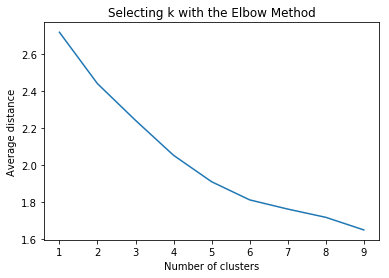

In [113]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

Results for k=2..6 can be interpreted due to the presence of a fracture point in this positions. I’ve selected k=3 for my further analysis.

To reduce number of variables PCA analysis were performed.  A scatterplot of the first two canonical variables by cluster can be seen below.

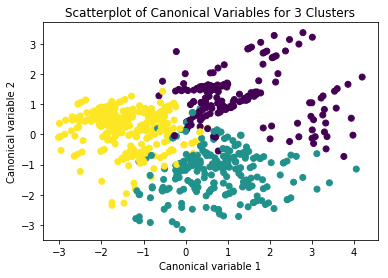

In [228]:
from PIL import Image
im = Image.open('data_kmean.png')
im

Cluster with yellow dots has low cluster variance,  cluster with green dots is also packed well enough, but some variance exists. And finally cluster with purple dots is well separated from other ones, but it is much more spread on the plot, showing high variance in the plot. Nevertheless, data is well separated (clusters overlap is not significant)=> k=3 is a suitable number for current situation. Although, other variants are possible.

Cluster 0 had the maximum value of Cement, Water and Age and the lowest value of BlastFurnaceSlag, Superplasticizer and FlyAsh compared to the other two clusters. Cluster 1 includes concrete with least Cement, CoarseAggregate, FineAggregate and Age and highest value of BlastFurnaceSlag, but otherwise tended to fall somewhere in between the other two clusters on the other variables. Cluster 2 includes concrete with maximum of FlyAsh, Superplasticizer and FineAggregate and minimum of Water.

In order to validate the clusters,  ANOVA analysis was conducted to test for significant differences between the clusters on grade point average (GPA). Results indicated some differences between the clusters on GPA (F(2, 715)=6.002, p<.0001). The tukey test showed that clusters differ significantly within GPA, although difference between cluster 1 and 2 is not significant.


# Code

In [192]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
%matplotlib inline
RND_STATE = 3971

In [193]:
df = pd.read_csv("Concrete_Data.csv", sep=";")
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,540.0,0.0,0.0,162.0,42492.0,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,42492.0,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [194]:
df.shape

(1027, 9)

In [195]:
df.dropna().shape

(1027, 9)

We see that there are no omissions in the data.

In [196]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1027.0,280.950925,104.571575,102.000000,192.000000,272.800000,350.000000,540.000000
BlastFurnaceSlag,1027.0,74.060419,86.351035,0.000000,0.000000,22.000000,143.000000,359.400000
FlyAsh,1027.0,53.879017,63.834788,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1027.0,181.587488,21.375824,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1027.0,15588.141008,18042.839610,0.000000,0.000000,13.930000,33512.000000,46235.000000
CoarseAggregate,1027.0,972.907644,77.863637,801.000000,932.000000,968.000000,1029.400000,1145.000000
FineAggregate,1027.0,773.971032,79.961308,594.000000,733.500000,780.000000,824.500000,992.600000
Age,1027.0,45.713729,63.254967,1.000000,7.000000,28.000000,56.000000,365.000000
ConcreteCompressiveStrength,1027.0,35.779084,16.712643,2.331808,23.693498,34.294536,45.919102,82.599225


Select сlustering variables (X) and target variable (y) as separate data sets  

In [197]:
X = df.drop('ConcreteCompressiveStrength', 1)
y = df['ConcreteCompressiveStrength']

Standardize predictors to have mean=0 and sd=1

In [198]:
clustervar=X.copy()
from sklearn import preprocessing
clustervar['Cement']=preprocessing.scale(clustervar['Cement'].astype('float64'))
clustervar['BlastFurnaceSlag']=preprocessing.scale(clustervar['BlastFurnaceSlag'].astype('float64'))
clustervar['FlyAsh']=preprocessing.scale(clustervar['FlyAsh'].astype('float64'))
clustervar['Water']=preprocessing.scale(clustervar['Water'].astype('float64'))
clustervar['Superplasticizer']=preprocessing.scale(clustervar['Superplasticizer'].astype('float64'))
clustervar['CoarseAggregate']=preprocessing.scale(clustervar['CoarseAggregate'].astype('float64'))
clustervar['FineAggregate']=preprocessing.scale(clustervar['FineAggregate'].astype('float64'))
clustervar['Age']=preprocessing.scale(clustervar['Age'].astype('float64'))

Split into train test datasets

In [199]:
clus_train, clus_test = train_test_split(clustervar, test_size=0.3, random_state=RND_STATE)

Making k-means analysis for 1-9 clusters

In [200]:
clusters=range(1,10)
meandist=[]

In [201]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

Plotting relation between number of clusters and average distance

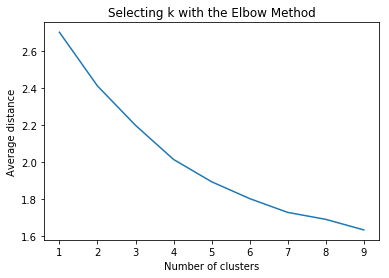

In [202]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

Checking solution for 3 clusters model

In [209]:
model3=KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)

Plotting clusters

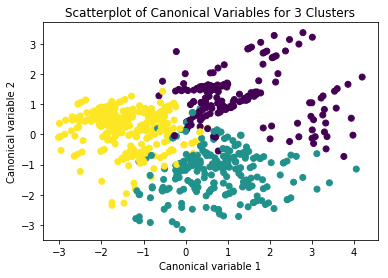

In [210]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

Merging cluster assignment with clustering variables to examine cluster variable means by cluster

In [211]:
clus_train.reset_index(level=0, inplace=True)
cluslist=list(clus_train['index'])
labels=list(model3.labels_)
newlist=dict(zip(cluslist, labels))

In [212]:
newclus=DataFrame.from_dict(newlist, orient='index')
newclus.columns = ['cluster']
newclus.describe()

,cluster
count,718.000000
mean,1.132312
std,0.803089
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [213]:
newclus.reset_index(level=0, inplace=True)
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
merged_train.cluster.value_counts()

2    285
1    243
0    190
Name: cluster, dtype: int64

Calculating clustering variable means by cluster

In [214]:
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)

Clustering variable means by cluster
              index    Cement  BlastFurnaceSlag    FlyAsh     Water  \
cluster                                                               
0        575.521053  0.690759         -0.733971 -0.800153  0.634172   
1        585.596708 -0.345544          1.229480 -0.421953  0.177603   
2        424.649123 -0.146665         -0.561685  0.881006 -0.582071   

         Superplasticizer  CoarseAggregate  FineAggregate       Age  
cluster                                                              
0               -0.839542         0.469696      -0.257991  0.392121  
1               -0.088516        -0.411490      -0.342423 -0.240339  
2                0.613122         0.044546       0.455142 -0.159134  


Validating clusters in training data by examining cluster differences in GPA using ANOVA

In [215]:
CCS_train, CCS_test = train_test_split(y, test_size=.3, random_state=RND_STATE)
CCS_train1=pd.DataFrame(CCS_train)
CCS_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(CCS_train1, merged_train, on='index')
sub1 = merged_train_all[['ConcreteCompressiveStrength', 'cluster']].dropna()

In [216]:
gpamod = smf.ols(formula='ConcreteCompressiveStrength ~ C(cluster)', data=sub1).fit()
print (gpamod.summary())

                                 OLS Regression Results                                
Dep. Variable:     ConcreteCompressiveStrength   R-squared:                       0.017
Model:                                     OLS   Adj. R-squared:                  0.014
Method:                          Least Squares   F-statistic:                     6.002
Date:                         Sun, 14 Jan 2018   Prob (F-statistic):            0.00260
Time:                                 22:32:51   Log-Likelihood:                -3013.4
No. Observations:                          718   AIC:                             6033.
Df Residuals:                              715   BIC:                             6046.
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------

In [217]:
print ('means for ConcreteCompressiveStrength by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

means for ConcreteCompressiveStrength by cluster
         ConcreteCompressiveStrength
cluster                             
0                          32.006140
1                          36.925673
2                          36.537320


In [218]:
print ('standard deviations for ConcreteCompressiveStrength by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

standard deviations for ConcreteCompressiveStrength by cluster
         ConcreteCompressiveStrength
cluster                             
0                          15.242330
1                          17.927940
2                          15.024262


In [219]:
mc1 = multi.MultiComparison(sub1['ConcreteCompressiveStrength'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1     4.9195   1.253  8.586   True 
  0      2     4.5312   0.9852 8.0772  True 
  1      2    -0.3884  -3.6942 2.9175 False 
--------------------------------------------
